# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [2]:
import pandas as pd
import sklearn
import sqlite3
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from itertools import product
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [472]:
df = pd.read_csv("../ex00/data/am_pm.csv")
df.head()
df_val = df.loc[len(df) - 5: len(df)]
df = df.loc[0: len(df) - 5]
y_val = df_val['target'].values
X_val = df_val[['am', 'pm']].values

## Train classifier and predict again for accuracy calculation

In [473]:
clf = LogisticRegression(random_state=21, fit_intercept=False).fit(df[['am', 'pm']].values, df[['target']].values[:, 0])
df['predict'] = clf.predict(df[['am', 'pm']].values)
print("Accuracy: ", sklearn.metrics.accuracy_score(df[['target']].values[:, 0], df[['predict']].values[:, 0]))

Accuracy:  0.5909090909090909


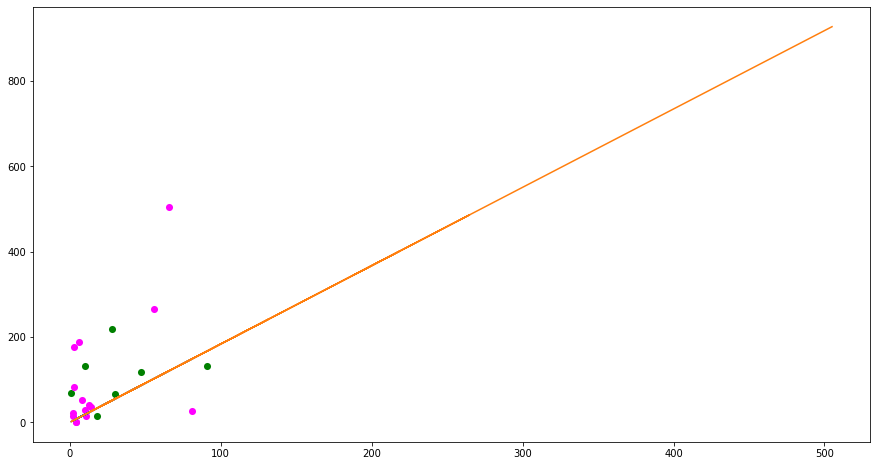

In [474]:
fig, ax = plt.subplots(1)
col =[]
for i in range(0, len(df)):
    if df['target'].values[i] == 0:
        col.append('green')  
    else:
        col.append('magenta') 

for i in range(len(df)):
    plt.scatter(df['am'].values[i], df['pm'].values[i], c=col[i], s=50,
                linewidth = 0)

desision_boundary = - clf.coef_[0][0]/clf.coef_[0][1] * df[['am', 'pm']].values
plt.plot(df[['am', 'pm']].values, desision_boundary)
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

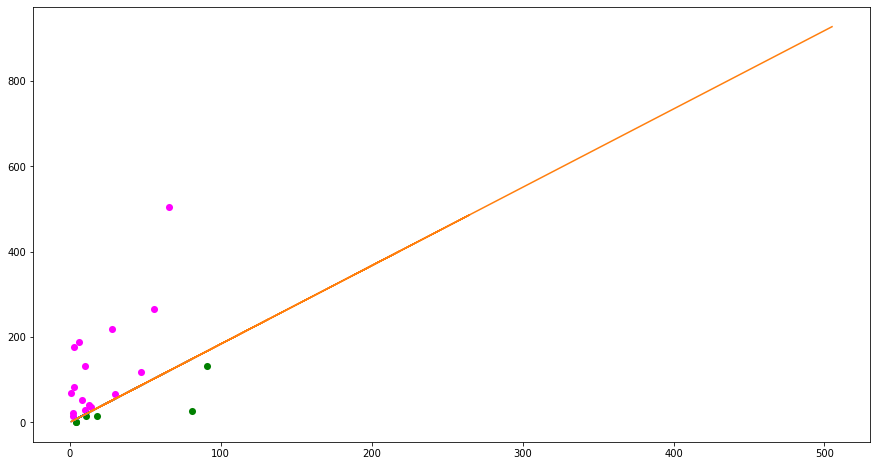

In [475]:
fig, ax = plt.subplots(1)
col =[]
for i in range(0, len(df)):
    if df['predict'].values[i] == 0:
        col.append('green')  
    else:
        col.append('magenta') 

for i in range(len(df)):
    plt.scatter(df['am'].values[i], df['pm'].values[i], c=col[i], s=50,
                linewidth = 0)
plt.plot(df[['am', 'pm']].values, desision_boundary)
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [476]:
scaler = StandardScaler()
scaler.fit(df[['am', 'pm']])
X = scaler.transform(df[['am', 'pm']])
clf.fit(X, df[['target']].values[:, 0])
df_val[['am', 'pm']] = scaler.transform(df_val[['am', 'pm']])

In [477]:
df[['target']].values[:, 0]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [478]:
y_predict =  clf.predict(X)
print("Accuracy: ", sklearn.metrics.accuracy_score(df[['target']].values[:, 0], y_predict))
print("Accuracy naiv: ", sklearn.metrics.accuracy_score(df[['target']].values[:, 0], [1] * 22))
df_scaled = df
df_scaled[['am', 'pm']] = X
df_scaled['predict'] = y_predict

Accuracy:  0.6818181818181818
Accuracy naiv:  0.6818181818181818


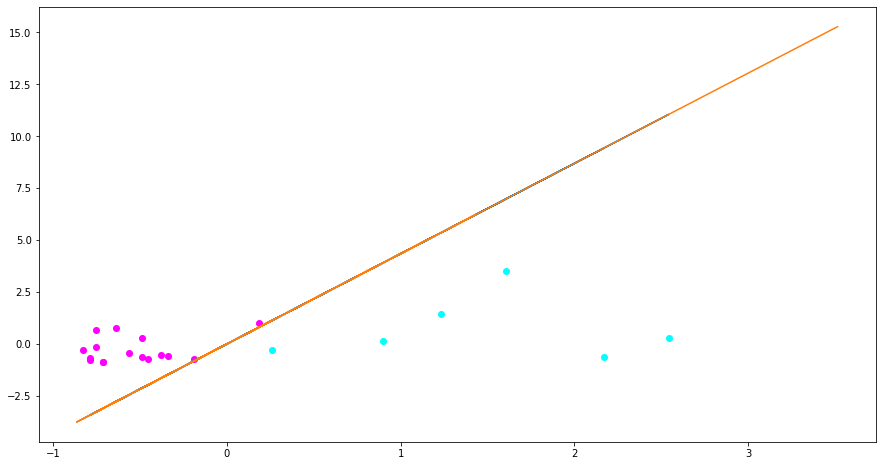

In [479]:
fig, ax = plt.subplots(1)
col =[]
for i in range(0, len(df)):
    if y_predict[i] == 0:
        col.append('cyan')  
    else:
        col.append('magenta') 

for i in range(len(df)):
    plt.scatter(X[i][0], X[i][1], c=col[i], s=50,
                linewidth = 0)

desision_boundary = - clf.coef_[0][0] /clf.coef_[0][1] * X
plt.plot(X, desision_boundary)
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

## Here i was trying to use different kernels but unfortunately thay preform the same accuracy and I can plot only if kernel is linear

In [480]:
svc = SVC(probability=True, random_state=21)
svc.fit(df_scaled[['am', 'pm']].values, df_scaled[['target']].values[:, 0])
df_scaled[['predict']].values[:, 0] = svc.predict(df_scaled[['am', 'pm']].values)
print("Accuracy: ", sklearn.metrics.accuracy_score(df_scaled[['target']].values[:, 0], df_scaled[['predict']].values[:, 0]))

Accuracy:  0.6818181818181818


In [481]:
svc = SVC(probability=True, random_state=21, kernel='linear')
svc.fit(df_scaled[['am', 'pm']].values, df_scaled[['target']].values[:, 0])
df_scaled[['predict']].values[:, 0] = svc.predict(df_scaled[['am', 'pm']].values)
print("Accuracy: ", sklearn.metrics.accuracy_score(df_scaled[['target']].values[:, 0], df_scaled[['predict']].values[:, 0]))

Accuracy:  0.6818181818181818


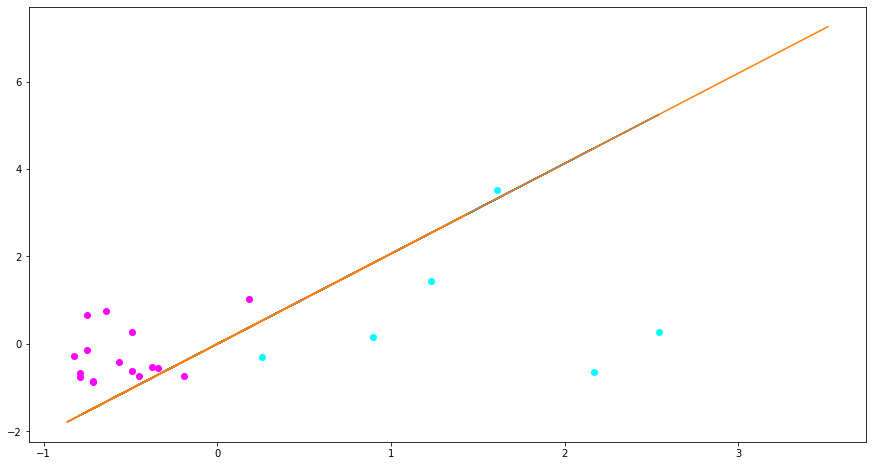

In [482]:
fig, ax = plt.subplots(1)
col =[]
for i in range(0, len(df)):
    if df_scaled['predict'].values[i] == 0:
        col.append('cyan')  
    else:
        col.append('magenta') 

for i in range(len(df)):
    plt.scatter(df_scaled['am'].values[i], f_valdf_scaled['pm'].values[i], c=col[i], s=50,
                linewidth = 0)

desision_boundary = - svc.coef_[0][0]/svc.coef_[0][1] * df_scaled[['am', 'pm']].values
plt.plot(df_scaled[['am', 'pm']].values, desision_boundary)
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [483]:
def PrintDTCMap(dtc, df_scaled, y_predict):
    # Plotting decision regions
    X = df_scaled[['am', 'pm']].values
    y = y_predict
    h = .02  # step size in the mesh
    ax = plt.subplot()

    cm = plt.cm.Spectral
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    score = sklearn.metrics.accuracy_score(df_scaled[['target']].values[:, 0], y_predict)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    # # Plot the decision boundary. For that, we will assign a color to each
    # # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(dtc, "decision_function"):
        Z = dtc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = dtc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    # # Plot the testing points
    # ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
    #            edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    # if ds_cnt == 0:
    #     ax.set_title(name)
    # ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
    #         size=15, horizontalalignment='right')
    plt.show()

In [494]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=42) 
dtc.fit(df_scaled[['am', 'pm']].values, df_scaled[['target']].values[:, 0])
y_predict = dtc.predict(df_scaled[['am', 'pm']].values)
y_test = dtc.predict(X_val)
print("Accuracy: ", sklearn.metrics.accuracy_score(df_scaled[['target']].values[:, 0], y_predict))
print("Accuracy val: ", sklearn.metrics.accuracy_score(y_val, y_test))

Accuracy:  1.0
Accuracy val:  0.0


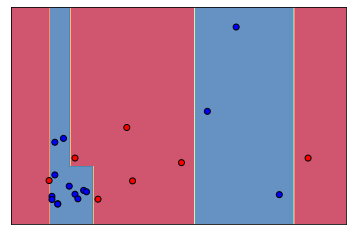

In [495]:
PrintDTCMap(dtc, df_scaled, y_predict)

##  Try to check on validation dataset

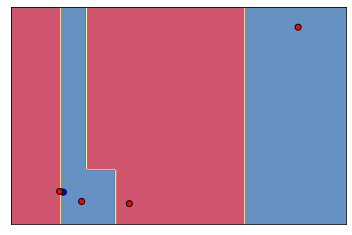

In [496]:
PrintDTCMap(dtc, df_val, y_test)

In [507]:
dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
dtc.fit(df_scaled[['am', 'pm']].values, df_scaled[['target']].values[:, 0])
y_predict = dtc.predict(df_scaled[['am', 'pm']].values)
y_test = dtc.predict(X_val)
print("Accuracy: ", sklearn.metrics.accuracy_score(df_scaled[['target']].values[:, 0], y_predict))
print("Accuracy val: ", sklearn.metrics.accuracy_score(y_val, y_test))

Accuracy:  0.9090909090909091
Accuracy val:  0.6


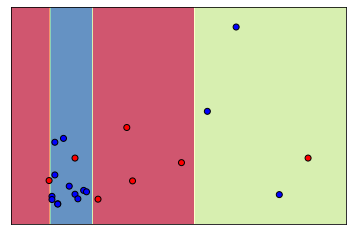

In [500]:
PrintDTCMap(dtc, df_scaled, y_pred)

## With smaller depth we should avoid overfitting

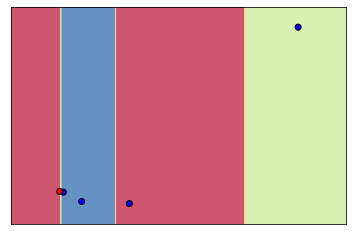

In [508]:
PrintDTCMap(dtc, df_val, y_test)

[Text(502.20000000000005, 453.0, 'X[0] <= -0.266\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(251.10000000000002, 271.8, 'X[0] <= -0.809\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(125.55000000000001, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(376.65000000000003, 90.59999999999997, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(753.3000000000001, 271.8, 'X[0] <= 1.065\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(627.75, 90.59999999999997, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(878.8500000000001, 90.59999999999997, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

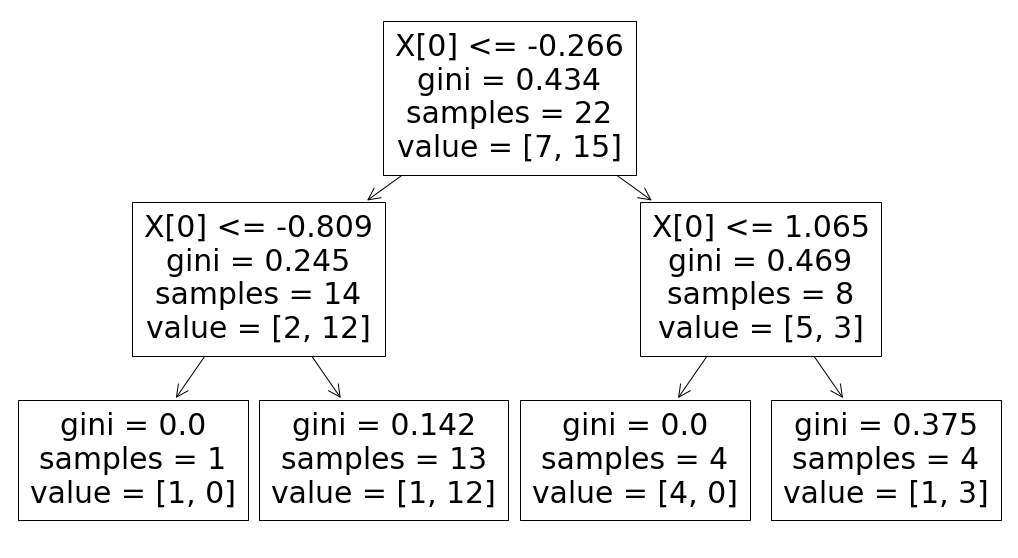

In [509]:
fig, ax = plt.subplots(figsize=(18, 10)) 
tree.plot_tree(dtc, ax=ax)

## How many leaves in the visualized tree label days as working days? It's equel 2